In [31]:
import pandas as pd
                              
df = pd. read_csv ('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9444,2023-09-01,331.309998,331.989990,326.779999,328.660004,328.660004,14931200
9445,2023-09-05,329.000000,334.850006,328.660004,333.549988,333.549988,18553900
9446,2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800
9447,2023-09-07,331.290009,333.079987,329.029999,329.910004,329.910004,18381000


In [32]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9444,2023-09-01,328.660004
9445,2023-09-05,333.549988
9446,2023-09-06,332.880005
9447,2023-09-07,329.910004


In [34]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]) , int(split[1]) , int(split[2])
    return datetime.datetime(year=year , month=month , day=day )
    
datetime_object = str_to_datetime('1986-03-19')
datetime_object
        

datetime.datetime(1986, 3, 19, 0, 0)

In [35]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9444,2023-09-01,328.660004
9445,2023-09-05,333.549988
9446,2023-09-06,332.880005
9447,2023-09-07,329.910004


In [36]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\dell\AppData\Local\Temp\ipykernel_15304\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9444   2023-09-01
9445   2023-09-05
9446   2023-09-06
9447   2023-09-07
9448   2023-09-08
Name: Date, Length: 9449, dtype: datetime64[ns]

In [38]:
df.index=df.pop('Date')
df


,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-09-01,328.660004
2023-09-05,333.549988
2023-09-06,332.880005


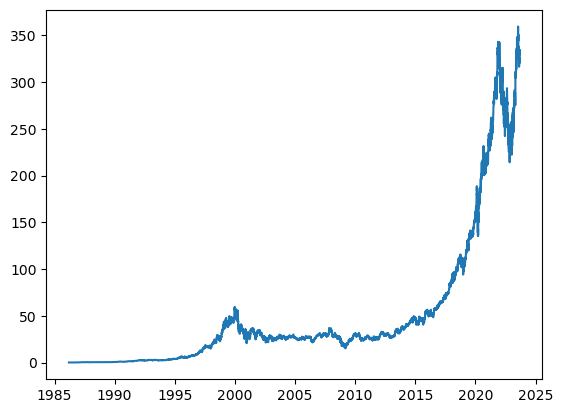

In [41]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [56]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [43]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

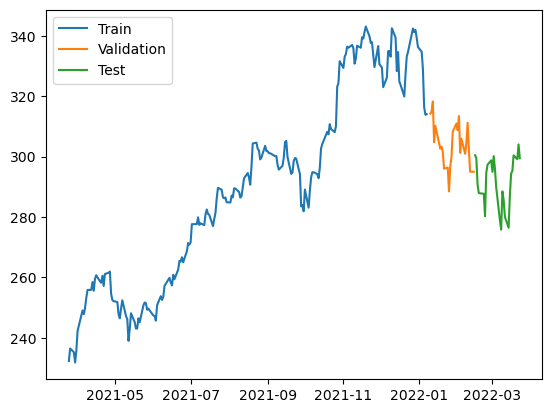

In [44]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [48]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 6s 166ms/step - loss: 84642.2812 - mean_absolute_error: 289.1927 - val_loss: 92318.2734 - val_mean_absolute_error: 303.7520
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 84385.8594 - mean_absolute_error: 288.7502 - val_loss: 92064.7109 - val_mean_absolute_error: 303.3344
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 84137.4297 - mean_absolute_error: 288.3173 - val_loss: 91775.1406 - val_mean_absolute_error: 302.8567
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 83837.0312 - mean_absolute_error: 287.7965 - val_loss: 91417.4609 - val_mean_absolute_error: 302.2656
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 83445.1562 - mean_absolute_error: 287.1159 - val_loss: 90915.1719 - val_mean_absolute_error: 301.4335
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 82936.1328 - mean_absolute_error: 286.2235 - val_loss: 90

7/7 [==============================] - 0s 13ms/step - loss: 1009.9987 - mean_absolute_error: 26.8579 - val_loss: 268.1951 - val_mean_absolute_error: 14.7549
Epoch 49/100
7/7 [==============================] - 0s 12ms/step - loss: 1010.0568 - mean_absolute_error: 26.8688 - val_loss: 256.6944 - val_mean_absolute_error: 14.3894
Epoch 50/100
7/7 [==============================] - 0s 10ms/step - loss: 1010.2065 - mean_absolute_error: 26.8654 - val_loss: 257.8038 - val_mean_absolute_error: 14.4251
Epoch 51/100
7/7 [==============================] - 0s 10ms/step - loss: 1010.4881 - mean_absolute_error: 26.8729 - val_loss: 264.1257 - val_mean_absolute_error: 14.6269
Epoch 52/100
7/7 [==============================] - 0s 10ms/step - loss: 1008.7951 - mean_absolute_error: 26.8492 - val_loss: 278.8734 - val_mean_absolute_error: 15.0873
Epoch 53/100
7/7 [==============================] - 0s 10ms/step - loss: 1002.5781 - mean_absolute_error: 26.7640 - val_loss: 326.4373 - val_mean_absolute_error: 1

Epoch 97/100
7/7 [==============================] - 0s 13ms/step - loss: 35.3530 - mean_absolute_error: 4.5763 - val_loss: 60.1988 - val_mean_absolute_error: 6.1621
Epoch 98/100
7/7 [==============================] - 0s 10ms/step - loss: 37.4623 - mean_absolute_error: 4.7962 - val_loss: 38.1173 - val_mean_absolute_error: 5.0229
Epoch 99/100
7/7 [==============================] - 0s 16ms/step - loss: 32.2777 - mean_absolute_error: 4.4190 - val_loss: 32.3859 - val_mean_absolute_error: 4.7992
Epoch 100/100
7/7 [==============================] - 0s 16ms/step - loss: 35.1334 - mean_absolute_error: 4.6067 - val_loss: 47.4065 - val_mean_absolute_error: 5.5715


7/7 [==============================] - 1s 3ms/step


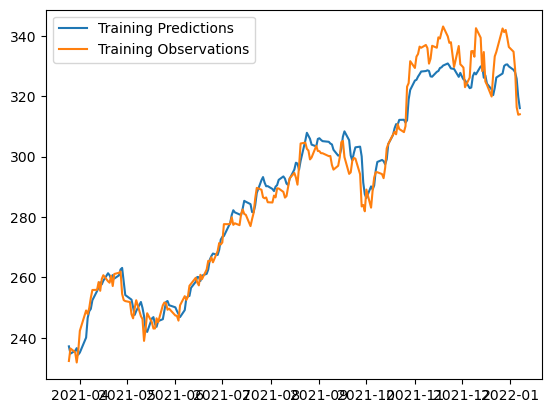

In [50]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 37ms/step


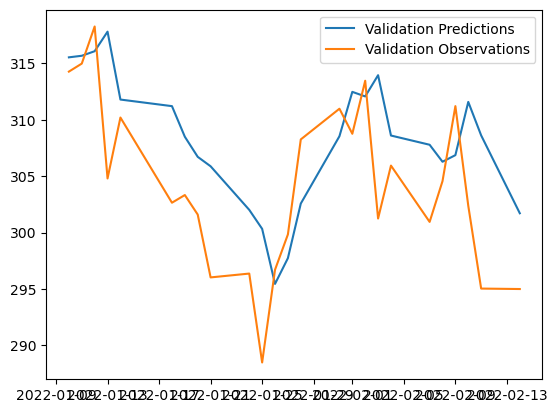

In [51]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
     

1/1 [==============================] - 0s 47ms/step


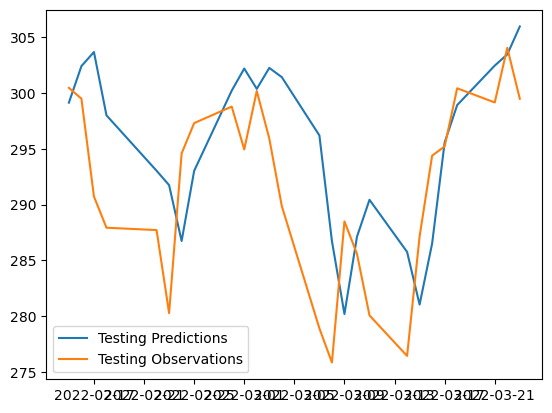

In [52]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

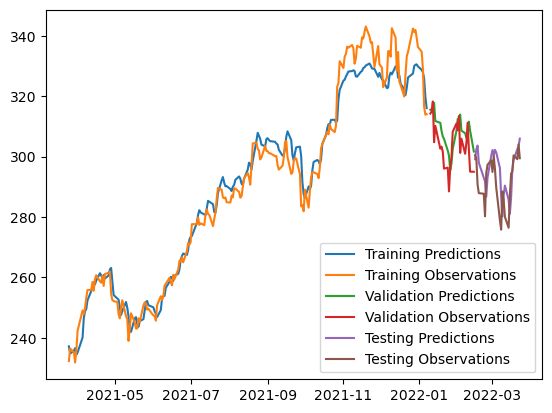

In [53]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [54]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 31ms/step


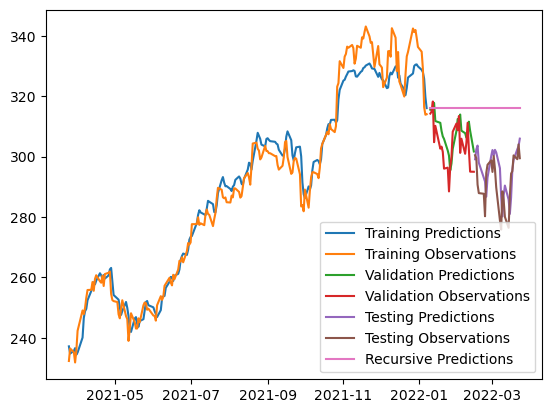

In [55]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])